In [1]:
import matplotlib.pyplot as plt
import centralities
import graph_handling
import warnings

warnings.filterwarnings('ignore')

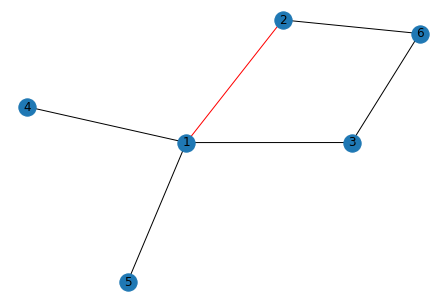

In [2]:
new_edge=(1, 2)
k, head, tail = 10, 6, 3
graph, new_graph = graph_handling.create(new_edge[0], new_edge[1])
graph_handling.show(graph, new_edge[0], new_edge[1])

This is the graph. the red edge is the one we are adding.

In [3]:
centralities.eigenvector_seeley(new_graph, False)[new_edge[0]]-centralities.eigenvector_seeley(graph, False)[new_edge[0]]

-0.004070000000000018

This is the score difference for the first node after and before adding the edge. It is negative probably because the graph befire adding the edge is disconnected

In [4]:
centralities.eigenvector_seeley(new_graph, False)[new_edge[1]]-centralities.eigenvector_seeley(graph, False)[new_edge[1]]

0.09651999999999998

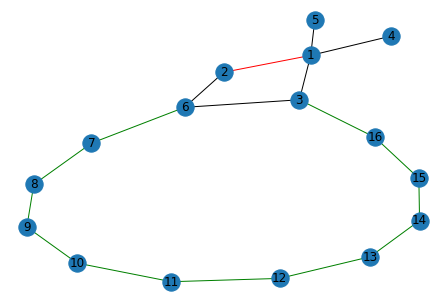

In [5]:
path = graph_handling.k_path(new_graph, k, head, tail)
k_path_edges = list(set(path.edges) - set(new_graph.edges))

graph_handling.show(path, new_edge[0], new_edge[1], k_path_edges)

#for i in range(k+1):
#    path_graph = graph_handling.k_path(new_graph, i, head, tail)
#    k_path_graph_edges = list(set(path_graph.edges) - set(new_graph.edges))
#    graph_handling.show(path_graph, new_edge[0], new_edge[1], k_path_graph_edges)

This is the "k_path graph". We choose a "head" and a "tail" and we create a path of length k from the first to the second and add it to the graph.


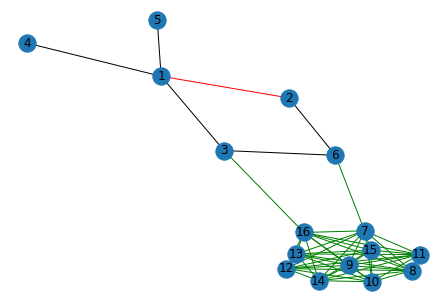

In [6]:
clique = graph_handling.k_clique(new_graph, k, head, tail)
k_clique_edges = list(set(clique.edges) - set(new_graph.edges))

graph_handling.show(clique, new_edge[0], new_edge[1], k_clique_edges)

#for i in range(k+1):
#    clique_graph = graph_handling.k_clique(new_graph, i, head, tail)
#    k_clique_graph_edges = list(set(clique_graph.edges) - set(new_graph.edges))
#    graph_handling.show(clique_graph, new_edge[0], new_edge[1], k_clique_graph_edges)

This is the "k_clique graph". We choose a "head" and a "tail" and we create a clique of dimension k connected to them, adding it to the graph

This is the score difference for the second node after and before adding the edge.

In [7]:
# computing scores for old and new k_path and k_clique graph
k_path_score, k_clique_score = centralities.eigenvector_at_k(graph, k, head, tail, False)
new_k_path_score, new_k_clique_score = centralities.eigenvector_at_k(new_graph, k, head, tail, False)

for k,v in k_path_score.items():
    print('k:' + str(k) + ' -> ' + str(v))

k:0 -> {1: 0.26007, 2: 0.0845, 3: 0.22123, 4: 0.13673, 5: 0.13673, 6: 0.16073}
k:1 -> {1: 0.15059, 2: 0.08987, 3: 0.23184, 4: 0.06328, 5: 0.06328, 6: 0.21387, 7: 0.18728}
k:2 -> {1: 0.13688, 2: 0.07762, 3: 0.1998, 4: 0.05897, 5: 0.05897, 6: 0.18018, 7: 0.14084, 8: 0.14675}
k:3 -> {1: 0.12813, 2: 0.0703, 3: 0.18111, 4: 0.056, 5: 0.056, 6: 0.16082, 7: 0.11652, 8: 0.10574, 9: 0.12538}
k:4 -> {1: 0.12239, 2: 0.0657, 3: 0.16951, 4: 0.05398, 5: 0.05398, 6: 0.14895, 7: 0.10249, 8: 0.08341, 9: 0.08662, 10: 0.11297}
k:5 -> {1: 0.11859, 2: 0.06274, 3: 0.16211, 4: 0.05261, 5: 0.05261, 6: 0.14144, 7: 0.09397, 8: 0.07039, 9: 0.0647, 10: 0.07545, 11: 0.10539}
k:6 -> {1: 0.11609, 2: 0.06083, 3: 0.15733, 4: 0.05169, 5: 0.05169, 6: 0.13662, 7: 0.08866, 8: 0.06249, 9: 0.05169, 10: 0.05359, 11: 0.06867, 12: 0.10063}
k:7 -> {1: 0.11445, 2: 0.0596, 3: 0.15425, 4: 0.05108, 5: 0.05108, 6: 0.13353, 7: 0.08531, 8: 0.05761, 9: 0.04375, 10: 0.04043, 11: 0.04682, 12: 0.06447, 13: 0.09762}
k:8 -> {1: 0.11339, 2: 0

We obtain for every value of k the scores of each node of the k_path graph, according to k.

In [8]:
# path
first_node_scores_path = [k_path_score[k][new_edge[0]] for k in k_path_score.keys()]
second_node_scores_path = [k_path_score[k][new_edge[1]] for k in k_path_score.keys()]

new_first_node_scores_path = [new_k_path_score[k][new_edge[0]] for k in new_k_path_score.keys()]
new_second_node_scores_path = [new_k_path_score[k][new_edge[1]] for k in new_k_path_score.keys()]

first_node_diff_path = [x - y for x, y in zip(new_first_node_scores_path, first_node_scores_path)]
second_node_diff_path = [x - y for x, y in zip(new_second_node_scores_path, second_node_scores_path)]

# clique
first_node_scores_clique = [k_clique_score[k][new_edge[0]] for k in k_clique_score.keys()]
second_node_scores_clique = [k_clique_score[k][new_edge[1]] for k in k_clique_score.keys()]

new_first_node_scores_clique = [new_k_clique_score[k][new_edge[0]] for k in new_k_clique_score.keys()]
new_second_node_scores_clique = [new_k_clique_score[k][new_edge[1]] for k in new_k_clique_score.keys()]

first_node_diff_clique = [x - y for x, y in zip(new_first_node_scores_clique, first_node_scores_clique)]
second_node_diff_clique = [x - y for x, y in zip(new_second_node_scores_clique, second_node_scores_clique)]

In [9]:
print(first_node_scores_path)
print(new_first_node_scores_path)

[0.26007, 0.15059, 0.13688, 0.12813, 0.12239, 0.11859, 0.11609, 0.11445, 0.11339, 0.1127, (0.11227+0j)]
[0.256, 0.18431, 0.17431, 0.16882, 0.16582, 0.16422, (0.16337-0j), 0.16294, (0.16271-0j), 0.1626, (0.16254+0j)]


These are the scores of the first node before and after adding the edge for increasing values of k in the k_path graph.

In [10]:
print(second_node_scores_path)
print(new_second_node_scores_path)

[0.0845, 0.08987, 0.07762, 0.0703, 0.0657, 0.06274, 0.06083, 0.0596, 0.0588, 0.0583, (0.05797+0j)]
[0.18102, 0.14201, 0.13218, 0.1269, 0.12406, 0.12255, (0.12176-0j), 0.12135, (0.12114-0j), 0.12103, (0.12098+0j)]


These are the scores of the second node before and after adding the edge for increasing values of k in the k_path graph.

In [11]:
print([round(x, 6) for x in first_node_diff_path])
print([round(x, 6) for x in second_node_diff_path])

[-0.00407, 0.03372, 0.03743, 0.04069, 0.04343, 0.04563, (0.04728-0j), 0.04849, (0.04932-0j), 0.0499, (0.05027+0j)]
[0.09652, 0.05214, 0.05456, 0.0566, 0.05836, 0.05981, (0.06093-0j), 0.06175, (0.06234-0j), 0.06273, (0.06301+0j)]


These are the score differences between the first and the second node, respectively, for increasing values of k in the k_path graph.

In [12]:
print('Scores of node ' + str(new_edge[0]) + ' before and after adding the edge for increasing values of k:')
print(first_node_scores_clique)
print(new_first_node_scores_clique)
print('\n')
print('Scores of node ' + str(new_edge[1]) + ' before and after adding the edge for increasing values of k:')
print(second_node_scores_clique)
print(new_second_node_scores_clique)
print('\n')
print('Differences in node ' + str(new_edge[0]) + ' and ' +  str(new_edge[1]) + ' for increasing values of k')
print([round(x, 6) for x in first_node_diff_clique])
print([round(x, 6) for x in second_node_diff_clique])

Scores of node 1 before and after adding the edge for increasing values of k:
[0.26007, 0.15059, 0.13688, 0.08423, 0.03721, 0.01661, 0.00848, 0.00486, 0.00303, 0.00202, 0.00141]
[0.256, 0.18431, 0.17431, 0.12315, 0.05459, 0.02227, 0.01066, 0.00586, 0.00355, 0.00231, 0.00159]


Scores of node 2 before and after adding the edge for increasing values of k:
[0.0845, 0.08987, 0.07762, 0.0566, 0.0297, 0.01458, 0.00781, 0.00459, 0.00291, 0.00196, 0.00137]
[0.18102, 0.14201, 0.13218, 0.09712, 0.04642, 0.0201, 0.00996, 0.00558, 0.00342, 0.00225, 0.00155]


Differences in node 1 and 2 for increasing values of k
[-0.00407, 0.03372, 0.03743, 0.03892, 0.01738, 0.00566, 0.00218, 0.001, 0.00052, 0.00029, 0.00018]
[0.09652, 0.05214, 0.05456, 0.04052, 0.01672, 0.00552, 0.00215, 0.00099, 0.00051, 0.00029, 0.00018]


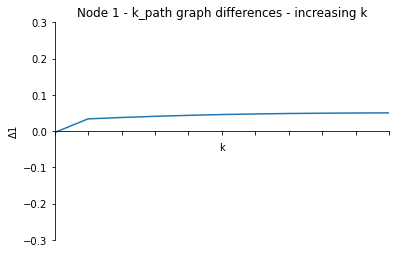

In [13]:
graph_handling.show_diff(first_node_diff_path, 'Node ' + str(new_edge[0]) + ' - k_path graph differences - increasing k', new_edge[0])

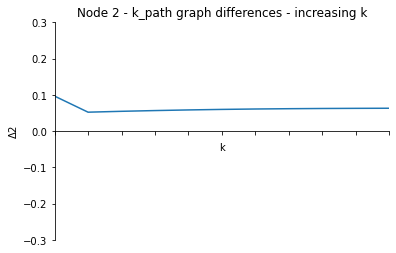

In [14]:
graph_handling.show_diff(second_node_diff_path, 'Node ' + str(new_edge[1]) + ' - k_path graph differences - increasing k', new_edge[1])

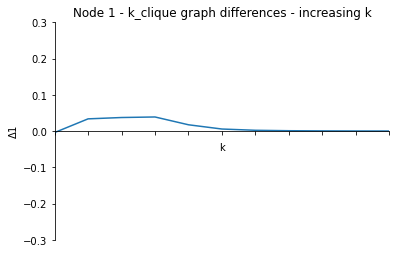

In [15]:
graph_handling.show_diff(first_node_diff_clique, 'Node ' + str(new_edge[0]) + ' - k_clique graph differences - increasing k', new_edge[0])

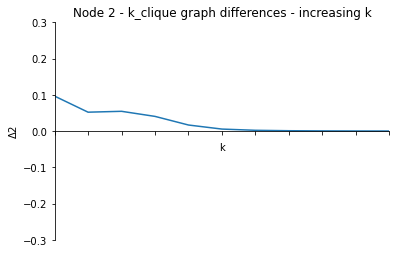

In [16]:
graph_handling.show_diff(second_node_diff_clique, 'Node ' + str(new_edge[1]) + ' - k_clique graph differences - increasing k', new_edge[1])

These plots show how the difference of the scores of the two nodes change before and after adding the edge for increasing value of k in the k_path and k_clique graphs.